# Poop Tracking Jackie the Cat



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)

In [2]:
# Read and remove unnamed column with start/stop dates of food
df = pd.read_csv('Jackie_Poop.csv').iloc[:,:-1]

Finn moved to another home on Sep 29, and before that it was unclear which poops were specifically Jackie's.

Therefore, take only data after Sep 29.

In [3]:
# Add the year to the date string, then convert to datetime
df.date = pd.to_datetime(df.date + ', 2021')
# Get only after Sep 29
df = df[df.date > '2021-09-29']

In [4]:
# Get only the poo data
df = df[df.poo == 'yes']
# Drop the pee column
df = df.drop(axis=1, labels=['pee'])

Some entries have just AM/PM instead of a time. Therefore, change AM to 10 AM, and PM to 8 PM

In [5]:
# Replace AM/PM values
def replace_am_pm(e):
    """Helper func to replace AM/PM to 10 AM and 8PM strings.
    
    Args:
        e: a pandas element
    
    Returns:
        Replaced string.
    """
    if e == 'AM':
        return '10:00 AM'
    elif e == 'PM':
        return '8:00 PM'
    else:
        return e  
    
df.time = df.time.apply(replace_am_pm)

In [6]:
# Merge date and time columns to a single timestamp
df.date = df.date + pd.to_timedelta(pd.to_datetime(df.time).dt.time.astype('str'))
df = df.drop(axis=1, labels=['time'])

In [7]:
# Reindex
df = df.reset_index(drop=True)

Sometimes Jackie poops multiple times in a part of the day. In these cases, offset the poops by 5 min for better plotting.

In [8]:
def jitter_dates(df):
    output = df.copy()
    # This is a loop to deal with cases where >2 duplications in a row.
    while output.date.duplicated().sum() > 0:
        # Get datetimes that are equal to the previous datetime by comparing offset vectors
        mask = output.date == output.date.shift()
        # Replace repeated datetimes with datetimes + 5 min
        output.date = output.date.mask(mask, other=(output.date + pd.Timedelta(hours=4)))
        
    return output

In [9]:
def calc_poops_per_day(poop_df):
    """
    Generates a poop per day df 
    
    empty dates
    """
    output = poop_df.copy()
    output.index = output.date
    output = output.resample('D').count()[['poo']]
    output = output.rename(columns={'poo':'poops_per_day'})
    output = output.reset_index()
    
    return output

In [10]:
ppd_df = calc_poops_per_day(df)

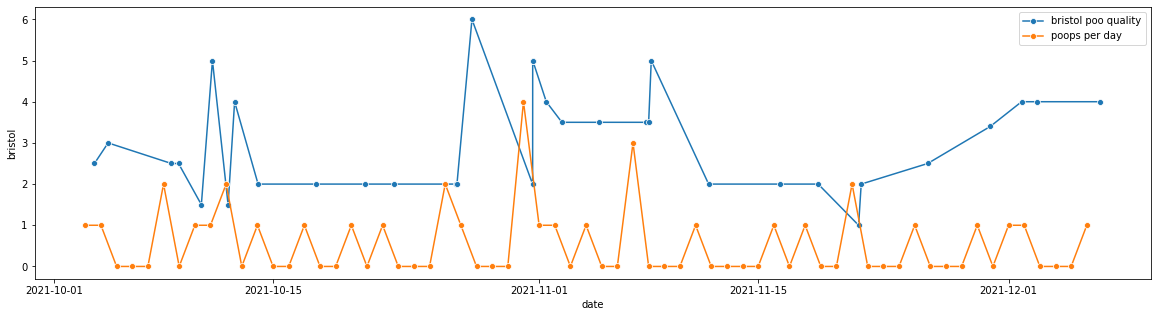

In [12]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data=jitter_dates(df), x='date', y='bristol', marker='o', label='bristol poo quality')
sns.lineplot(data=ppd_df, x='date', y='poops_per_day', marker='o', label='poops per day')

plt.legend();

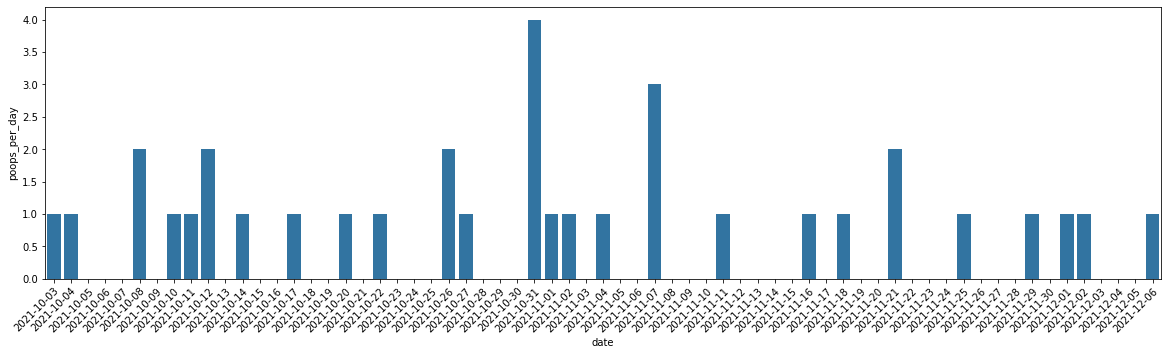

In [28]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=ppd_df, x='date', y='poops_per_day', color='tab:blue')
#plt.xticks(ppd_df.date.dt.date);
plt.xticks(plt.xticks()[0], ppd_df.date.dt.date, rotation=45, rotation_mode='anchor', ha='right');

In [43]:
df

,date,time,poo,bristol,"zoom, yowl, mucus",notes
46,2021-10-03,2:00 PM,yes,2.5,NaN,"Pooped, large amount that looked like 2 long s..."
47,2021-10-04,11:00 AM,yes,3.0,mucus,"Poop - maybe about a 3 on the scale, still a b..."
49,2021-10-08,12:00 PM,yes,2.5,yowl,Gave lactulose this morning (and previous 2 me...
50,2021-10-08,11:00 PM,yes,2.5,NaN,"Had a second poo of the day, pretty good quali..."
51,2021-10-10,10:00 AM,yes,1.5,mucus,"Had a poo, was about a 1 on one end, and like ..."
53,2021-10-11,3:00 AM,yes,5.0,"zoom, yowl","had the zoomies and yeowling, had a small soft..."
54,2021-10-12,3:00 AM,yes,1.5,NaN,had a poo similar to Oct 10 morning
55,2021-10-12,1:00 PM,yes,4.0,NaN,"poo, small volume, broken apart softish 4?"
56,2021-10-14,1:00 AM,yes,2.0,NaN,"poo, good quality (2), more brown then grey (I..."
59,2021-10-17,6:00 PM,yes,2.0,NaN,"pooped, good quality (2), brown - has been on ..."


In [31]:
df.head()

,date,time,pee,poo,bristol,"zoom, yowl, mucus",notes
0,2021-09-09,10:00 PM,no,no,NaN,NaN,Jackie hissed a few times and they growled at ...
1,2021-09-10,9:00 AM,no,no,NaN,NaN,"1 bowl was eaten, the other was 3/4 finished. ..."
2,2021-09-10,1:00 PM,yes,no,NaN,NaN,"Played with wand toy, Jackie came out of the t..."
3,2021-09-10,3:30 PM,no,yes,NaN,NaN,poo was part 2 part 5
4,2021-09-10,10:00 PM,no,yes,NaN,NaN,Only about 1/3 to 1/2 of food was eaten. Kind...


In [6]:
df[df.date == 'Oct 12']

,date,time,pee,poo,bristol,lactulose + psyllium,PEG,"zoom, yowl, mucus",notes,Unnamed: 9
54,Oct 12,3:00 AM,NaN,yes,1.5,1.0,0.0,NaN,had a poo similar to Oct 10 morning,"Stopped Fancy Feast, Start Performatrin/Wellne..."
55,Oct 12,1:00 PM,NaN,yes,4.0,1.0,0.0,NaN,"poo, small volume, broken apart softish 4?",NaN
